<a href="https://colab.research.google.com/github/joseemaro/bdm_EvaluatingGoogleApps/blob/main/tpfinal_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore_user_reviews.csv

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline
plt.style.use('seaborn-white')
#w2v
import re
import collections
import gensim
import nltk
from nltk.corpus import stopwords
import plotly.express as px

--2021-07-22 16:45:28--  https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore_user_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7669276 (7.3M) [text/plain]
Saving to: ‘googleplaystore_user_reviews.csv’

googleplaystore_use 100%[===================>]   7.31M  46.5MB/s    in 0.2s    

2021-07-22 16:45:29 (46.5 MB/s) - ‘googleplaystore_user_reviews.csv’ saved [7669276/7669276]



In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from gensim.models import Word2Vec
from numpy import asarray
from numpy import zeros
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import RegexpTokenizer
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')
nltk.download('wordnet')
import math
from bs4 import BeautifulSoup
import tensorflow as tf
import numpy as np
import skimage
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lee el archivo
data = pd.read_csv("googleplaystore_user_reviews.csv", encoding = "utf-8") 

## Preprocesamiento de los datos

In [4]:
#se verifica si hay nan de los registros
data.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [5]:
#se borran los registros con nan
df = data.dropna()

In [6]:
#se verifica si hay nan de los registros
df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

## Exploracion de datos

In [7]:
#cantidad de reviews por cada tipo(positivo,negativo, neutral)
temp = df.groupby('Sentiment').count()['Translated_Review'].reset_index().sort_values(by='Translated_Review',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Sentiment,Translated_Review
2,Positive,23998
0,Negative,8271
1,Neutral,5158


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


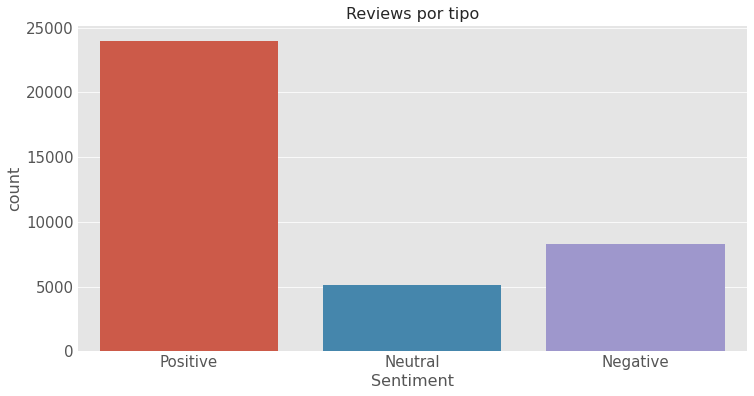

In [8]:
#grafico de las reviews por tipo
plt.figure(figsize=(12,6))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.title("Reviews por tipo", fontsize=16)
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Count', fontsize=16)
sns.countplot(x='Sentiment',data=df)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


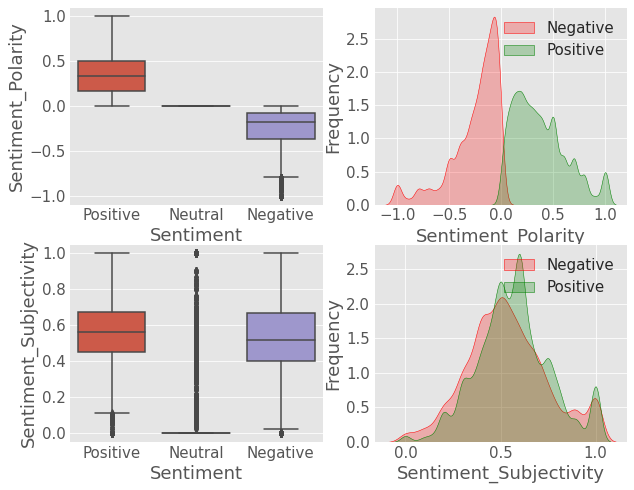

In [9]:
#se van a comparar las columnas numericas Sentiment_Polarity y Sentiment_Subjectivity
num_col = ['Sentiment_Polarity', 'Sentiment_Subjectivity']

plt.figure(figsize=(10, 8))
count = 1
for cols in num_col:
    plt.subplot(2, 2, count)
    sns.boxplot(x='Sentiment', y= cols, data= df)
    count +=1
    
    plt.subplot(2, 2, count)
    g = sns.kdeplot(df[cols][(df["Sentiment"] == "Negative") & (df[cols].notnull())], color="Red", shade = True)
    g = sns.kdeplot(df[cols][(df["Sentiment"] == "Positive") & (df[cols].notnull())], ax =g, color="Green", shade= True)
    g.set_xlabel(cols)
    g.set_ylabel("Frequency")
    g = g.legend(["Negative","Positive"])
    count+=1


Polaridad:
- Positivos = la polaridad de las reviews es superior, la mediana es 0,37
- Negativos = la polaridad de las reviews es inferior, la mediana es -0.12
- Neutros = la polaridad de las reviews es 0.

Subjetividad:
- Positivos = la Subjetividad de las reviews es superior, la mediana es 0,58
- Negativos = la Subjetividad de las reviews es inferior a los positivos, la mediana es 0.55
- Neutros = se observan gran cantidad de outliers.


Text(0.5, 1.0, 'top 15 Apps')

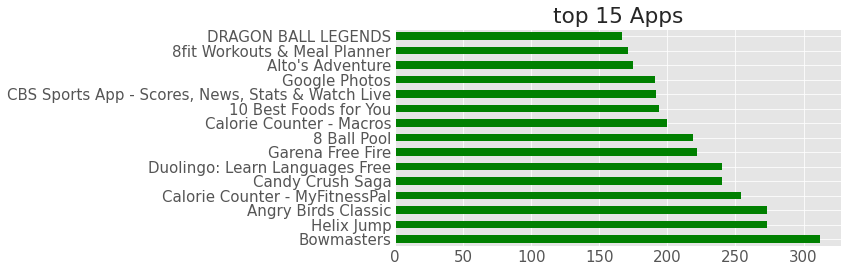

In [11]:
#Top 15 apps con mayor cantidad de reviews
plt.figure(figsize=(8, 4))
df['App'].value_counts()[0:15].plot.barh(color="g").set_title('top 15 Apps')

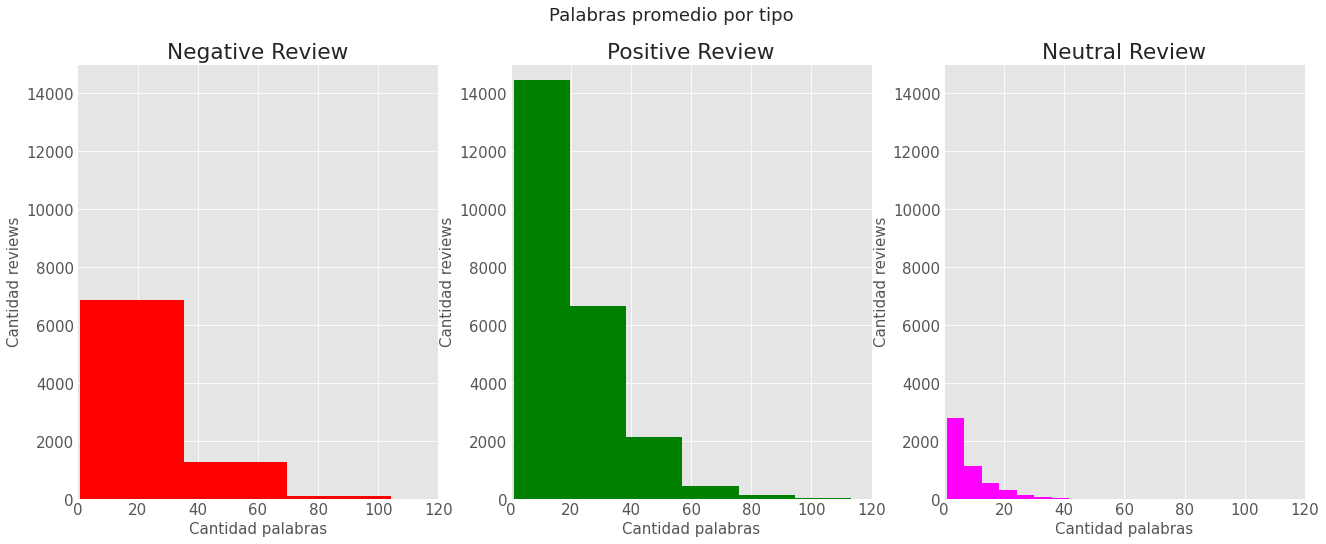

In [12]:
#Se explora el campo Translated_Review
#Numero de caracteres para los diferentes tipos de comentarios
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(22,8))
df_len_neg=df[df['Sentiment']=='Negative']['Translated_Review'].str.split().map(lambda x: len(x))
ax1.hist(df_len_neg,color='red')
ax1.set_title('Negative Review')
ax1.set_xlabel('Cantidad palabras', fontsize=15)
ax1.set_ylabel('Cantidad reviews', fontsize=15)
df_len_pos=df[df['Sentiment']=='Positive']['Translated_Review'].str.split().map(lambda x: len(x))
ax2.hist(df_len_pos,color='green')
ax2.set_title('Positive Review')
ax2.set_xlabel('Cantidad palabras', fontsize=15)
ax2.set_ylabel('Cantidad reviews', fontsize=15)
df_len_neutral=df[df['Sentiment']=='Neutral']['Translated_Review'].str.split().map(lambda x: len(x))
ax3.hist(df_len_neutral,color='magenta')
ax3.set_title('Neutral Review')
ax3.set_xlabel('Cantidad palabras', fontsize=15)
ax3.set_ylabel('Cantidad reviews', fontsize=15)
fig.suptitle('Palabras promedio por tipo')
ax1.set_xlim(0, 120) 
ax1.set_ylim(0, 15000) 
ax2.set_xlim(0, 120) 
ax2.set_ylim(0, 15000) 
ax3.set_xlim(0, 120) 
ax3.set_ylim(0, 15000) 
plt.show()

Text(0.5, 0.98, 'Largo promedio de palabras por tipo')

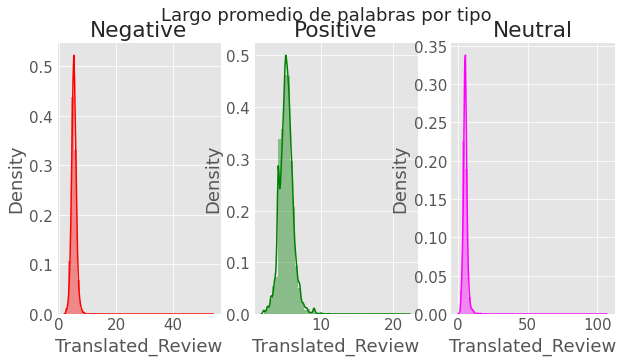

In [13]:
#Average word length in a review
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
word=df[df['Sentiment']=='Negative']['Translated_Review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Negative')
word=df[df['Sentiment']=='Positive']['Translated_Review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Positive')
word=df[df['Sentiment']=='Neutral']['Translated_Review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='magenta')
ax3.set_title('Neutral')
fig.suptitle('Largo promedio de palabras por tipo')

Negativos : 0-30 palabras promedio en  mas de 6900 reviews
Positivos : 0-20 palabras promedio en  mas de 14000 reviews
Neutrales : 0-6 palabras promedio en  mas de 2700 reviews


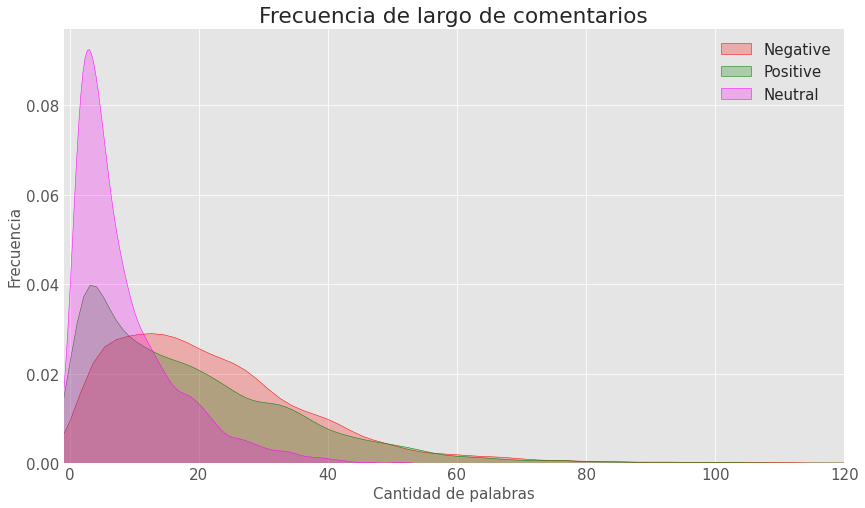

In [14]:
#Se busca analizar la frecencia del largo de las reviews entre los diferentes tipos
plt.figure(figsize=(14, 8))
g = sns.kdeplot(df_len_neg, color="Red", shade = True)
g = sns.kdeplot(df_len_pos, ax =g, color="Green", shade= True)
g = sns.kdeplot(df_len_neutral, ax =g, color="magenta", shade= True)

g.set_xlabel("Cantidad de palabras",fontsize=15)
g.set_ylabel("Frecuencia",fontsize=15)
g.set_title("Frecuencia de largo de comentarios")
g.set_xlim(-1, 120) 
g = g.legend(["Negative","Positive","Neutral"], fontsize=15)

Se puede observar que la densidad es mucho mayor en los comentarios neutrales que en el resto.

## Se comenzara con el analisis de los comentarios de las aplicaciones

Conteo de palabras mas repetidas

In [15]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
split_words = []
top = []
for review in df.Translated_Review:
    top.append(review)

In [17]:
top = str(top)
reviews = str(df.Translated_Review)

In [18]:
wordcount = {}
for word in reviews.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stop_words:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [33]:
word_counter = collections.Counter(wordcount)
temp = pd.DataFrame(lst, columns = ['Word', 'Count'])
temp.plot.bar(x='Word',y='Count')

NameError: ignored

## NGRAM ANALISIS

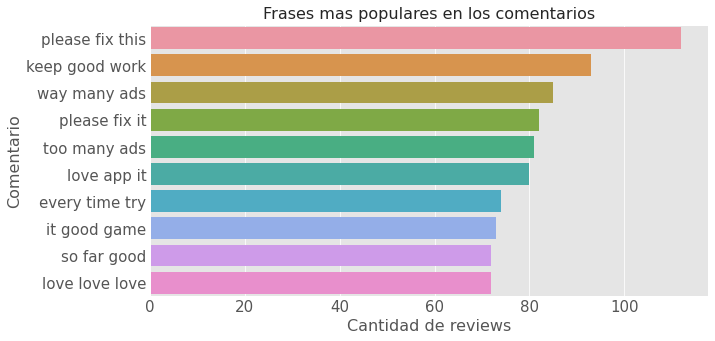

In [20]:
#Se va a realizar un analisis bigram(n=2) sobre los comentarios
#Primero se buscan los bigrams mas comunes
from sklearn.feature_extraction.text import CountVectorizer

def get_top_df_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_df_bigrams=get_top_df_bigrams(df['Translated_Review'])[:10]
x,y=map(list,zip(*top_df_bigrams))
plt.title("Frases mas populares en los comentarios", fontsize=16)
plt.xlabel('Cantidad de reviews', fontsize=16)
plt.ylabel('Comentario', fontsize=16)
sns.barplot(x=y,y=x)


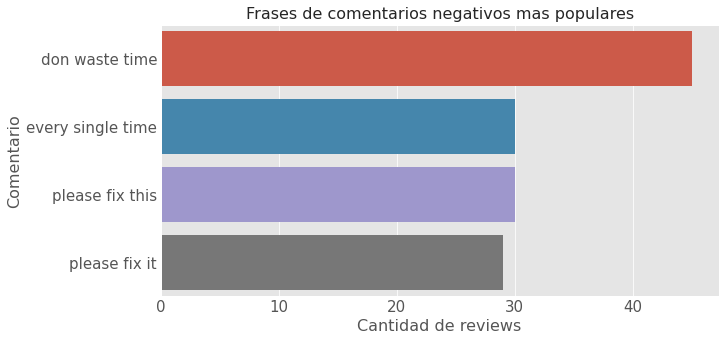

In [21]:
#frases negativas
plt.figure(figsize=(10,5))
top_df_bigrams=get_top_df_bigrams(df[df['Sentiment']=='Negative']['Translated_Review'])[:4]
x,y=map(list,zip(*top_df_bigrams))
plt.title("Frases de comentarios negativos mas populares", fontsize=16)
plt.xlabel('Cantidad de reviews', fontsize=16)
plt.ylabel('Comentario', fontsize=16)
sns.barplot(x=y,y=x)

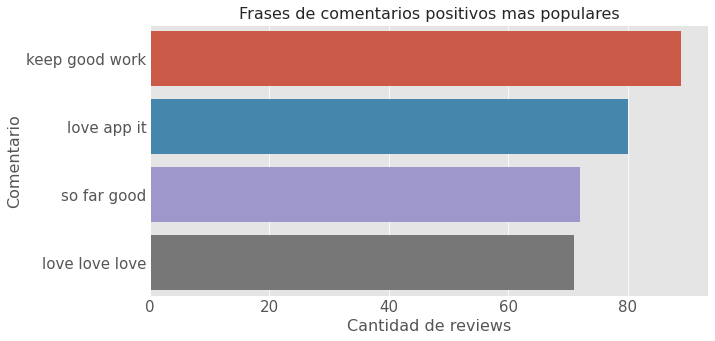

In [22]:
#frases positivas
plt.figure(figsize=(10,5))
top_df_bigrams=get_top_df_bigrams(df[df['Sentiment']=='Positive']['Translated_Review'])[:4]
x,y=map(list,zip(*top_df_bigrams))
plt.title("Frases de comentarios positivos mas populares", fontsize=16)
plt.xlabel('Cantidad de reviews', fontsize=16)
plt.ylabel('Comentario', fontsize=16)
sns.barplot(x=y,y=x)

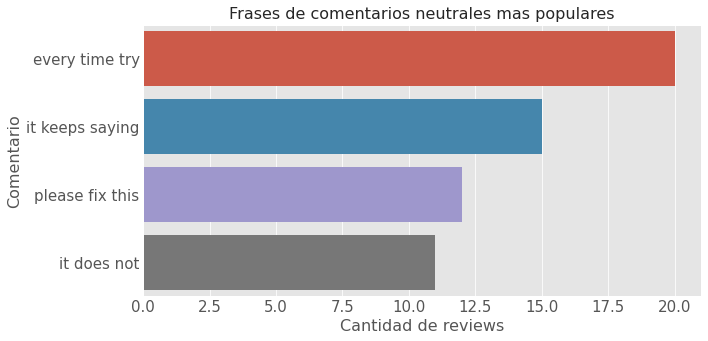

In [23]:
#frases neutrales
plt.figure(figsize=(10,5))
top_df_bigrams=get_top_df_bigrams(df[df['Sentiment']=='Neutral']['Translated_Review'])[:4]
x,y=map(list,zip(*top_df_bigrams))
plt.title("Frases de comentarios neutrales mas populares", fontsize=16)
plt.xlabel('Cantidad de reviews', fontsize=16)
plt.ylabel('Comentario', fontsize=16)
sns.barplot(x=y,y=x)

## W2V model

In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

In [ ]:
%%time
documents = [_text.split() for _text in df.Translated_Review] 

In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 6731


In [ ]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=8)

In [ ]:
w2v_model.most_similar("love")

In [ ]:
w2v_model.most_similar("cant")

## Se aplica el modelo sobre el dataset preprocesado(en la sig. seccion se hace el preprocesamiento)

In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

In [ ]:
%%time
documents = [_text.split() for _text in df2['df2_lm'] ] 

In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

In [ ]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=8)

In [ ]:
w2v_model.most_similar("cant")

[('let', 0.5757821202278137),
 ('wont', 0.5669353604316711),
 ('couldnt', 0.5643585920333862),
 ('though', 0.5417283773422241),
 ('facebook', 0.541580319404602),
 ('unable', 0.534504234790802),
 ('able', 0.5295367240905762),
 ('none', 0.5235387086868286),
 ('everytime', 0.523474931716919),
 ('anymore', 0.5199243426322937)]

In [ ]:
w2v_model.most_similar("update")

[('mess', 0.6786094903945923),
 ('release', 0.6749361753463745),
 ('latest', 0.6664899587631226),
 ('longer', 0.6389445662498474),
 ('unusable', 0.630269467830658),
 ('july', 0.6275305151939392),
 ('htc', 0.6045019626617432),
 ('june', 0.5977612733840942),
 ('marshmallow', 0.5893391370773315),
 ('break', 0.5691273212432861)]

## Word cloud sobre las reviews de cada tipo

Primero se hace una limpieza de los datos

In [24]:
#Se remueven URLs

df2=df

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df2['df2_NoURL']=df2['Translated_Review'].apply(lambda x : remove_URL(x))


In [25]:
#Se remueven Tags HTML

df2['df2_NoURL']=df2['df2_NoURL'].apply(str)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df2['df2_NoHTML']=df2['df2_NoURL'].apply(lambda x : remove_html(x))

In [26]:
#Se remueven Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticonos
                           u"\U0001F300-\U0001F5FF"  # simbolos
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df2['df2_NoEMOJI']=df2['df2_NoHTML'].apply(lambda x: remove_emoji(x))


In [27]:
#Se remueven puntuaciones
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df2['df2_NoPUNKT']=df2['df2_NoEMOJI'].apply(lambda x : remove_punct(x))


In [28]:
#Se pasa todo a minusculas
df2['df2_tolower']= df2['df2_NoPUNKT'].str.lower()


In [29]:
#Se remueve la puntuacion 'n usada en ingles

sw = stopwords.words('english')

def transform_text(s):
    
    #Remueve html
    html=re.compile(r'<.*?>')
    s = html.sub(r'',s)
    
    #Remueve numeros
    s = re.sub(r'\d+', '', s)
    
    #Remueve puntuacion
    #Remueve stopwords
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        #Remueve palabras con largo= 2 y stopwords
        if len(w) > 2 and w not in sw:
            new_string.append(w)
 
    s = ' '.join(new_string)
    s = s.strip()

    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    
    return s.strip()

df2['df2_sw'] = df2['df2_tolower'].apply(transform_text)


In [30]:
#Lemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatizer_text(s):
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        lem = lemmatizer.lemmatize(w, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lem) > 2:
            new_string.append(lem)
    
    s = ' '.join(new_string)
    return s.strip()


df2['df2_lm'] = df2['df2_sw'].apply(lemmatizer_text)

In [31]:
#Se pasa a minusculas, se selecciona el alfabeto y se remueven las stopwords
def create_corpus(df):
    corpus=[]
    #corpus_new=[]
    for row in tqdm(df['df2_lm']):
        words=[word.lower() for word in word_tokenize(row) if((word.isalpha()==1) & (word.lower() not in stop))]
        corpus.append(words)
        #words_new = (word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word.lower() not in stop)))
        #corpus_new.append(words_new)
    return corpus

corpus=create_corpus(df2)

100%|██████████| 37427/37427 [00:05<00:00, 6915.77it/s]


In [32]:
#Largo maximo de una fila en el corpus
MAX_LEN = max(len(x) for x in corpus)
print("MAX_LEN = ", MAX_LEN)

MAX_LEN =  289


### Una vez completado el procesamiento de los datos se procede a utilizar la libreria wordCloud para mostrar las palabras mas destacadas de cada tipo de reviews

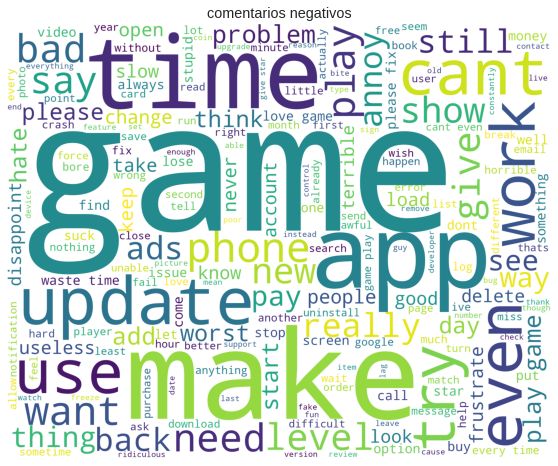

In [ ]:
#Se realiza el wordcloud para los comentarios negativos
df_neg = df2[df2['Sentiment']=="Negative"]['df2_lm']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))

plt.figure(1,figsize=(10, 8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("comentarios negativos")
plt.show()

Se puede obsevar que entre los comentarios negativos se repiten mucho palabras como waste time, need(to improve something), update(error en algun update), frustrate, cant, bad, please fix, hate, ads(muy invasivas), terrible, problem.


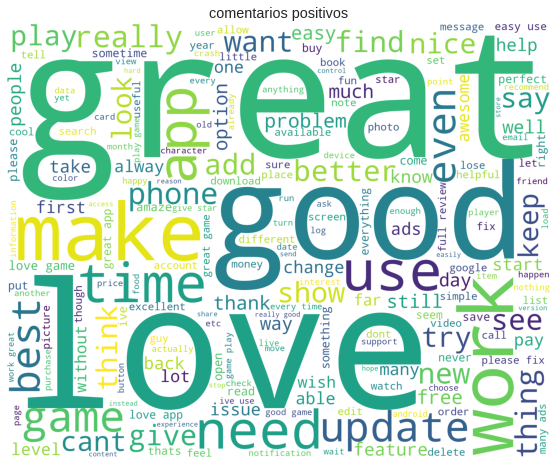

In [ ]:
#Se realiza el wordcloud para los comentarios positivos
df_pos = df2[df2['Sentiment']=="Positive"]['df2_lm']


wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(10, 8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("comentarios positivos")
plt.show()

Se puede observar que entre los comentarios positivos se repiten mucho palabras como love, good, great, better, use, work, thank, best.

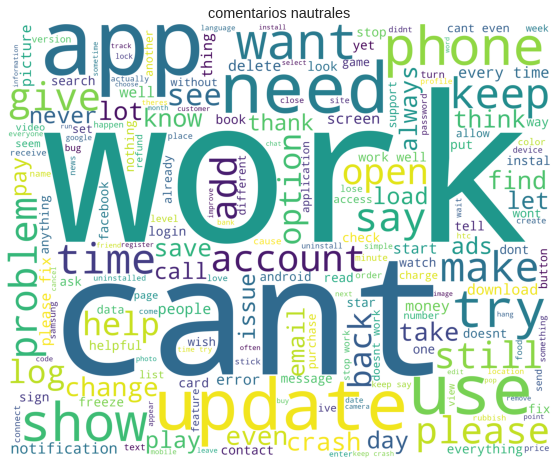

In [ ]:
#Se realiza el wordcloud para los comentarios neutrales
df_neu = df2[df2['Sentiment']=="Neutral"]['df2_lm']


wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neu))

plt.figure(1,figsize=(10, 8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("comentarios nautrales")
plt.show()

Entre los comentarios neutrales observamos que se repiten mucho palabras como cant, work, update, make, keep, please, problem, waste time, want, account, crash.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


CONTINUACION EN 2021

In [ ]:
!wget https://raw.githubusercontent.com/joseemaro/bdm_EvaluatingGoogleApps/main/appReview.csv

In [86]:
# Lee el archivo
ar = pd.read_csv("appReview.csv", encoding = "utf-8") 

In [89]:
#verifico nombre de columnas
ar.columns.values

array(['App', 'translated_review', 'Category', 'Rating', 'Reviews',
       'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres'],
      dtype=object)

In [88]:
#renombra la primera columna
ar = ar.rename (columns = {'\ufeffApp':'App'})

# Apps con mas reviews

Text(0.5, 1.0, 'top 15 Apps')

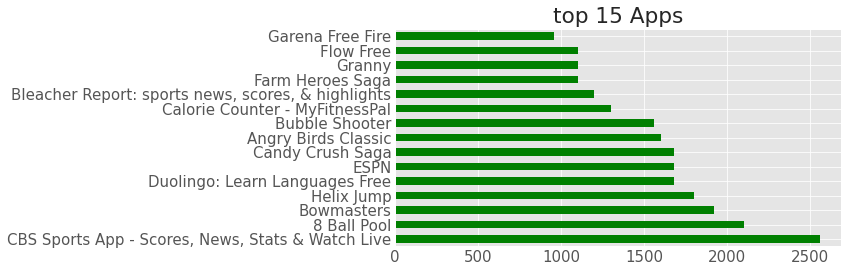

In [53]:
#Top 15 apps con mayor cantidad de reviews
plt.figure(figsize=(8, 4))
ar['App'].value_counts()[0:15].plot.barh(color="g").set_title('top 15 Apps')

In [ ]:
#Filtro por las 2 apps con mas reviews.
values=['CBS Sports App - Scores, News, Stats & Watch Live' ,'8 Ball Pool']
arDes = ar[ar.App.isin(values)]
arDes

# CATEGORIAS CON MAS REVIEWS

In [ ]:
#cantidad de reviews por cada categoria
temp = ar.groupby('Category').count()['App'].reset_index().sort_values(by='App',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [ ]:
#Filtro por las 3 categorias con mas reviews.
values=['GAME', 'FAMILY', 'SPORTS']
arCat = ar[ar.Category.isin(values)]

# Reviews por Rating


In [194]:
arRat = ar
#se remplaza los nan de rating por la media debido a que son muchos registros
arRat['Rating'].fillna((arRat['Rating'].mean()), inplace=True)

agrupamiento en 5 grupos 1-5

In [195]:
arRat['Rating'] = round(arRat['Rating'], 0)

In [196]:
arRat = arRat.replace({'Rating':{0.0:1,0.1:1,0.2:1,0.3:1,0.4:1,0.5:1,0.6:1,0.7:1,0.8:1,0.9:1,1.0:1}})
arRat = arRat.replace({'Rating':{1.1:2,1.2:2,1.3:2,1.4:2,1.5:2,1.6:2,1.7:2,1.8:2,1.9:2,2.0:2}})
arRat = arRat.replace({'Rating':{2.1:3,2.2:3,2.3:3,2.4:3,2.5:3,2.6:3,2.7:3,2.8:3,2.9:3,3.0:3}})
arRat = arRat.replace({'Rating':{3.1:4,3.2:4,3.3:4,3.4:4,3.5:4,3.6:4,3.7:4,3.8:4,3.9:4,4.0:4}})
arRat = arRat.replace({'Rating':{4.1:5,4.2:5,4.3:5,4.313525:5,4.31352543:5,4.4:5,4.5:5,4.6:5,4.7:5,4.8:5,4.9:5,5.0:5,19:5}})

No handles with labels found to put in legend.


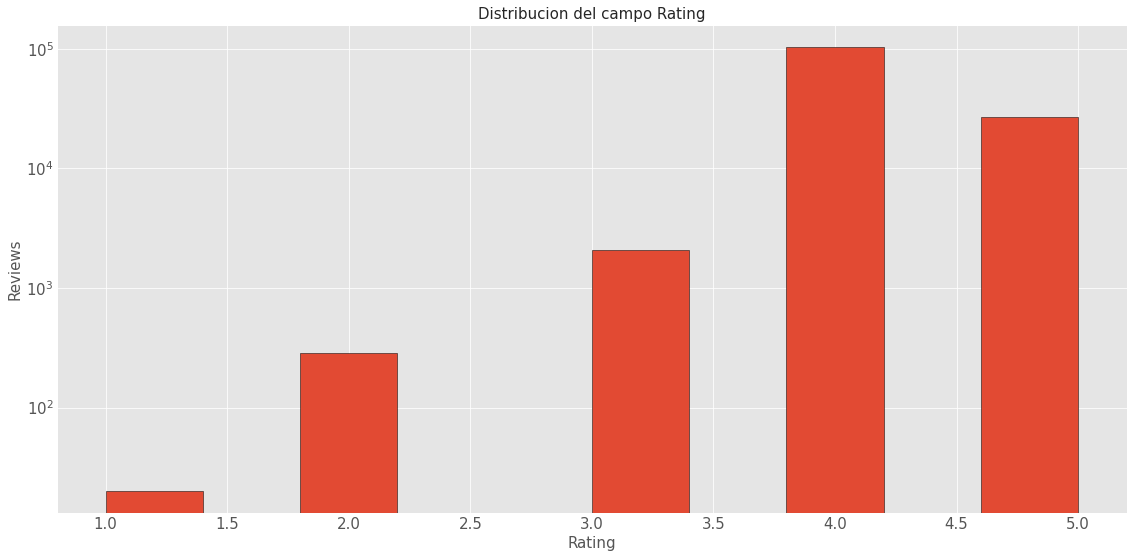

In [197]:
#vamos a observar la distribucion de la variable rating con un histograma
fig = plt.figure(figsize=(16,8)) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
plt.hist(arRat['Rating'],edgecolor = 'black', log=True, range= [1,5])
plt.title("Distribucion del campo Rating", fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Reviews', fontsize=15)
plt.tight_layout()
plt.legend()